<a href="https://colab.research.google.com/github/gendeb/cloud-computing-specialization/blob/master/Blockchain_bolsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import datetime
import hashlib

class Block:
    def __init__(self, data):
        self.blockNo = 0
        self.data = data
        self.next = None
        self.nonce = 0
        self.previous_hash = "0x0"
        self.timestamp = datetime.datetime.now()

    def compute_hash(self):
        """
        Compute the hash of the block using SHA-256.
        """
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') +
            str(self.data).encode('utf-8') +
            str(self.previous_hash).encode('utf-8') +
            str(self.timestamp).encode('utf-8') +
            str(self.blockNo).encode('utf-8')
        )
        return h.hexdigest()

    def __str__(self):
        return (f"Block Hash: {self.compute_hash()}\n"
                f"BlockNo: {self.blockNo}\n"
                f"Block Data: {self.data}\n"
                f"Hashes: {self.nonce}\n"
                f"--------------")

class Blockchain:
    def __init__(self):
        self.diff = 20  # Difficulty level
        self.maxNonce = 2**32  # Maximum nonce value
        self.target = 2 ** (256 - self.diff)  # Target hash value
        self.block = Block("Genesis")  # Genesis block
        self.head = self.block  # Head of the blockchain

    def add(self, block):
        """
        Add a block to the blockchain.
        """
        block.previous_hash = self.block.compute_hash()
        block.blockNo = self.block.blockNo + 1
        self.block.next = block
        self.block = self.block.next

    def mine(self, block):
        """
        Mine a block by finding a valid nonce.
        """
        for n in range(self.maxNonce):
            if int(block.compute_hash(), 16) <= self.target:
                self.add(block)
                print(block)
                break
            else:
                block.nonce += 1

# Create a blockchain
blockchain = Blockchain()

# Mine 10 blocks
for n in range(10):
    blockchain.mine(Block(f"Block {n + 1}"))

# Traverse and print the blockchain
current_block = blockchain.head
while current_block is not None:
    print(current_block)
    current_block = current_block.next

Block Hash: c70798aad30f6d769fde07dfcd4fbc51a5efd8d1a8a43b1cbf833c48e1e0579e
BlockNo: 1
Block Data: Block 1
Hashes: 158807
--------------
Block Hash: e6bf72ae6e88e9fdac5d196103890a48e990e7bf309d50dc1f64ce3be2bf17b3
BlockNo: 2
Block Data: Block 2
Hashes: 280704
--------------
Block Hash: 7913c385c17f3653467102147e4b50bd7a1acc9c117661c2c8cfd353a2e4612d
BlockNo: 3
Block Data: Block 3
Hashes: 331875
--------------
Block Hash: abba45a4b5c08c69c77aadebb89940ee19243959d6205b8d8a2ca2059a15315b
BlockNo: 4
Block Data: Block 4
Hashes: 1548745
--------------
Block Hash: a888261fc15fec5e8a9cf5d86174ec50617cac073201e96ad457c725c768f756
BlockNo: 5
Block Data: Block 5
Hashes: 60471
--------------
Block Hash: 683f32f87f6ff36b464b0ecc5d6e5a467ecedd919988205ae61801e28f08387c
BlockNo: 6
Block Data: Block 6
Hashes: 9496
--------------
Block Hash: e11d0a8458e0c86a5b8da0412f70852a2e368ec38923ea451ea87a355e143b84
BlockNo: 7
Block Data: Block 7
Hashes: 1558684
--------------
Block Hash: 347adedd4f9e793064adeec

Validation of the chain

In [ ]:
import datetime
import hashlib

class Block:
    def __init__(self, data):
        self.blockNo = 0
        self.data = data
        self.next = None
        self.nonce = 0
        self.previous_hash = "0x0"
        self.timestamp = datetime.datetime.now()

    def compute_hash(self):
        """
        Compute the hash of the block using SHA-256.
        """
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') +
            str(self.data).encode('utf-8') +
            str(self.previous_hash).encode('utf-8') +
            str(self.timestamp).encode('utf-8') +
            str(self.blockNo).encode('utf-8')
        )
        return h.hexdigest()

    def __str__(self):
        return (f"Block Hash: {self.compute_hash()}\n"
                f"BlockNo: {self.blockNo}\n"
                f"Block Data: {self.data}\n"
                f"Hashes: {self.nonce}\n"
                f"--------------")

class Blockchain:
    def __init__(self):
        self.diff = 20  # Difficulty level
        self.maxNonce = 2**32  # Maximum nonce value
        self.target = 2 ** (256 - self.diff)  # Target hash value
        self.block = Block("Genesis")  # Genesis block
        self.head = self.block  # Head of the blockchain

    def add(self, block):
        """
        Add a block to the blockchain.
        """
        block.previous_hash = self.block.compute_hash()
        block.blockNo = self.block.blockNo + 1
        self.block.next = block
        self.block = self.block.next

    def mine(self, block):
        """
        Mine a block by finding a valid nonce.
        """
        for n in range(self.maxNonce):
            if int(block.compute_hash(), 16) <= self.target:
                self.add(block)
                print(block)
                break
            else:
                block.nonce += 1

    def validate_chain(self):
        """
        Validate the integrity of the blockchain.
        """
        current_block = self.head
        previous_hash = "0x0"  # Genesis block has no previous hash

        while current_block is not None:
            # Check if the block's hash is valid
            if current_block.compute_hash() != current_block.compute_hash():
                print(f"Block {current_block.blockNo} has an invalid hash.")
                return False

            # Check if the previous_hash matches the hash of the previous block
            if current_block.previous_hash != previous_hash:
                print(f"Block {current_block.blockNo} has an invalid previous hash.")
                return False

            # Move to the next block
            previous_hash = current_block.compute_hash()
            current_block = current_block.next

        print("Blockchain is valid.")
        return True

# Create a blockchain
blockchain = Blockchain()

# Mine 10 blocks
for n in range(10):
    blockchain.mine(Block(f"Block {n + 1}"))

# Validate the blockchain
blockchain.validate_chain()

# Traverse and print the blockchain
current_block = blockchain.head
while current_block is not None:
    print(current_block)
    current_block = current_block.next

Block Hash: 0cacaa6c27890281ac108c6967953fefc745ba7cb83c935b545cf85f6cc11522
BlockNo: 1
Block Data: Block 1
Hashes: 582992
--------------
Block Hash: 4b42ae8932a3f0999717b6342a35715a00c4507feaaae6f31d105cf7d26c5176
BlockNo: 2
Block Data: Block 2
Hashes: 896046
--------------
Block Hash: 64dc5cf4881c3d03e6c21d99972c46fad414bddc9d267111ba0c479aac1c365b
BlockNo: 3
Block Data: Block 3
Hashes: 1130166
--------------
Block Hash: 85192027bbf12e0365174329183d3caa4af0e47aca3b6b610b8ccccccadeb3c5
BlockNo: 4
Block Data: Block 4
Hashes: 13010
--------------
Block Hash: 00b446487b274465f77cc1d79c811dce86284e9e3eadafbc304ece3874211ebb
BlockNo: 5
Block Data: Block 5
Hashes: 625024
--------------
Block Hash: deb507c9a1136466c5aa42211062119309c8a4b7929d802d530e2c8a8bad9b51
BlockNo: 6
Block Data: Block 6
Hashes: 1612496
--------------
Block Hash: ed110dfe3a3381bb3a402ce476824049675e9603ec65f42790d9163bfa8d42af
BlockNo: 7
Block Data: Block 7
Hashes: 425868
--------------
Block Hash: 0001a54002c1784f7c385

Visualization with Matlib and Networkx

Block Hash: 471fcbbfcc9f745b35b338426a15d564785d3e398b1d70b1af32c45293ac724a
BlockNo: 1
Block Data: Block 1
Hashes: 68567
--------------
Block Hash: c5dce0f9e1f2f1f0964729f69e3e1b2de66d96788bf332b05a8c63d6b24c183f
BlockNo: 2
Block Data: Block 2
Hashes: 2590077
--------------
Block Hash: 444432c6d32445918a63fcff8660c3b0c0b8aa4e14b47364b83b0c86698c772f
BlockNo: 3
Block Data: Block 3
Hashes: 799461
--------------
Block Hash: ff6ad3e960f3d5bacc9c663f290c900bf91de1a56c35fae418111ccbb4262a95
BlockNo: 4
Block Data: Block 4
Hashes: 276450
--------------
Block Hash: af644d5568651be3823c298be1b243d4161f1418a8f91f2fe5c36402266e901d
BlockNo: 5
Block Data: Block 5
Hashes: 2055187
--------------
Block Hash: e915aa9e15e0f1eb04f5deeb3cb24c8e9c36351d70435d64d33a6f5dc911d12c
BlockNo: 6
Block Data: Block 6
Hashes: 1926579
--------------
Block Hash: e9df3bb5d7efb7ec9793dd58203da7cc9b735ed95555f4f494c63f13da7c5b44
BlockNo: 7
Block Data: Block 7
Hashes: 325092
--------------
Block Hash: 1f6e0ec08f8a6e47028b

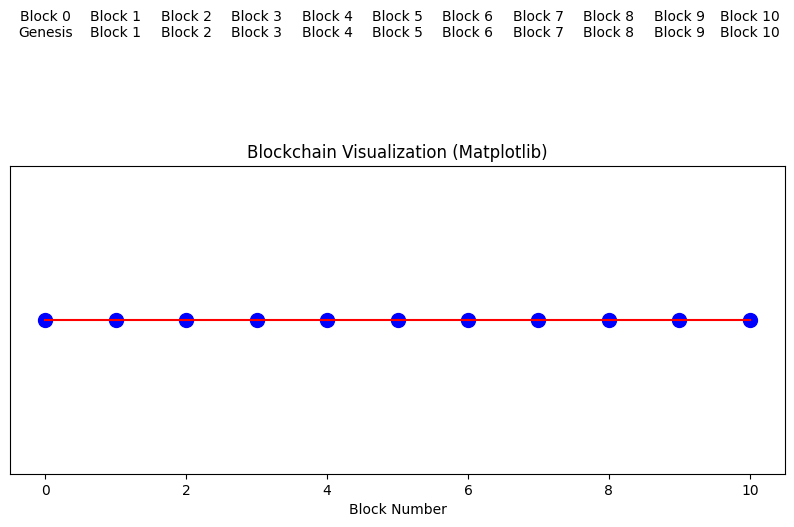

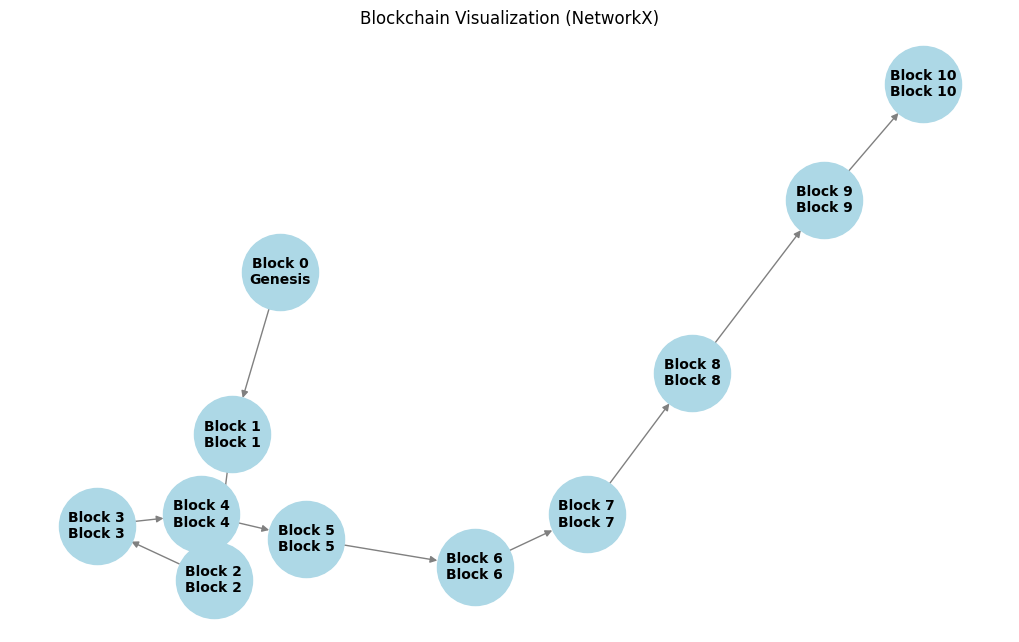

In [ ]:
import datetime
import hashlib
import matplotlib.pyplot as plt
import networkx as nx

class Block:
    def __init__(self, data):
        self.blockNo = 0
        self.data = data
        self.next = None
        self.nonce = 0
        self.previous_hash = "0x0"
        self.timestamp = datetime.datetime.now()

    def compute_hash(self):
        """
        Compute the hash of the block using SHA-256.
        """
        h = hashlib.sha256()
        h.update(
            str(self.nonce).encode('utf-8') +
            str(self.data).encode('utf-8') +
            str(self.previous_hash).encode('utf-8') +
            str(self.timestamp).encode('utf-8') +
            str(self.blockNo).encode('utf-8')
        )
        return h.hexdigest()

    def __str__(self):
        return (f"Block Hash: {self.compute_hash()}\n"
                f"BlockNo: {self.blockNo}\n"
                f"Block Data: {self.data}\n"
                f"Hashes: {self.nonce}\n"
                f"--------------")

class Blockchain:
    def __init__(self):
        self.diff = 20  # Difficulty level
        self.maxNonce = 2**32  # Maximum nonce value
        self.target = 2 ** (256 - self.diff)  # Target hash value
        self.block = Block("Genesis")  # Genesis block
        self.head = self.block  # Head of the blockchain

    def add(self, block):
        """
        Add a block to the blockchain.
        """
        block.previous_hash = self.block.compute_hash()
        block.blockNo = self.block.blockNo + 1
        self.block.next = block
        self.block = self.block.next

    def mine(self, block):
        """
        Mine a block by finding a valid nonce.
        """
        for n in range(self.maxNonce):
            if int(block.compute_hash(), 16) <= self.target:
                self.add(block)
                print(block)
                break
            else:
                block.nonce += 1

    def validate_chain(self):
        """
        Validate the integrity of the blockchain.
        """
        current_block = self.head
        previous_hash = "0x0"  # Genesis block has no previous hash

        while current_block is not None:
            # Check if the block's hash is valid
            if current_block.compute_hash() != current_block.compute_hash():
                print(f"Block {current_block.blockNo} has an invalid hash.")
                return False

            # Check if the previous_hash matches the hash of the previous block
            if current_block.previous_hash != previous_hash:
                print(f"Block {current_block.blockNo} has an invalid previous hash.")
                return False

            # Move to the next block
            previous_hash = current_block.compute_hash()
            current_block = current_block.next

        print("Blockchain is valid.")
        return True

    def visualize_blockchain_matplotlib(self):
        """
        Visualize the blockchain using matplotlib.
        """
        current_block = self.head
        x = []  # X-coordinates for blocks
        y = []  # Y-coordinates for blocks
        labels = []  # Labels for blocks

        # Traverse the blockchain and collect data
        while current_block is not None:
            x.append(current_block.blockNo)
            y.append(0)  # All blocks are on the same level for simplicity
            labels.append(f"Block {current_block.blockNo}\n{current_block.data}")
            current_block = current_block.next

        # Plot the blockchain
        plt.figure(figsize=(10, 4))
        plt.scatter(x, y, color='blue', s=100)  # Plot blocks as points
        for i in range(len(x) - 1):
            plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color='red')  # Draw lines between blocks

        # Add labels
        for i, label in enumerate(labels):
            plt.text(x[i], y[i] + 0.1, label, ha='center', va='bottom')

        plt.title("Blockchain Visualization (Matplotlib)")
        plt.xlabel("Block Number")
        plt.yticks([])  # Hide Y-axis ticks
        plt.show()

    def visualize_blockchain_networkx(self):
        """
        Visualize the blockchain using networkx.
        """
        G = nx.DiGraph()  # Create a directed graph
        current_block = self.head

        # Traverse the blockchain and add nodes/edges
        while current_block is not None:
            G.add_node(current_block.blockNo, label=f"Block {current_block.blockNo}\n{current_block.data}")
            if current_block.next is not None:
                G.add_edge(current_block.blockNo, current_block.next.blockNo)
            current_block = current_block.next

        # Draw the graph
        pos = nx.spring_layout(G)  # Layout for the graph
        labels = nx.get_node_attributes(G, 'label')
        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
        plt.title("Blockchain Visualization (NetworkX)")
        plt.show()

# Create a blockchain
blockchain = Blockchain()

# Mine 10 blocks
for n in range(10):
    blockchain.mine(Block(f"Block {n + 1}"))

# Validate the blockchain
blockchain.validate_chain()

# Visualize the blockchain using matplotlib
blockchain.visualize_blockchain_matplotlib()

# Visualize the blockchain using networkx
blockchain.visualize_blockchain_networkx()